# **IEOR 4404  Simulation (Spring 2020)**

**Homework 4 [Total points: 60]**


**Due 11:59 PM, March 9**

Homework 4 consists of application-oriented exercises focusing on

* Sampling from a discrete distribution using the inverse transform method
* Sampling from a discrete distribution using the rejection sampling method
* Sampling from a continuous distribution using the inverse transform method
 

The steps to finish the homework:

*   Step 1: Answer your homework on Google Colab.
*   Step 2: Submit the copy on Google Assignment

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)

In [3]:
#Your Name: Limeng Lu
#Your UNI: ll3359

In [4]:
#This imports all the packages you need for the homework (you might not use some of them)
#Please run this first
import numpy as np

import scipy.special as spsp

import scipy.stats as spst

import matplotlib.pyplot as plt

%matplotlib inline


#Exercise 1 [16 Points]

**Setting**

Let's again, focus on sampling from Binomial distribution

$PMF(k)=\frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}$

Let's assume $n=10$ and $p=0.4$.




##Q1. [6 Points]

* Assume that we want to implement the upward-downward search starting from $CDF(k=b)$. Construct a function that gives the expected number of searches when the search starts at $b$ for a binomial distribution with $n$ and $p$.
* Compute the number searches for a binomial distribution with $n=10$ and $p=0.4$ for $b=1,b=3, \dots,b=9$.


In [5]:
def expected_search(b,n,p):
    x=np.arange(n+1)
    pmf=spsp.factorial(n)/spsp.factorial(x)/spsp.factorial(n-x)
    pmf=pmf*p**x*(1-p)**(n-x)
    searches1=np.arange(2,n-b+2)
    searches2=np.arange(b+2,1,-1)
    searches=np.append(searches2,searches1)
    searches
    return np.sum(pmf*searches)
[expected_search(b,10,0.4) for b in range(1,11,2)]

[4.058450636799999,
 2.8216681472000005,
 3.3039166464,
 5.015859712,
 7.0001048575999985]

## Q2. [10 Points]

* Implement the upward/downward search when the search start from $CDF(k=4)$ for this binomial distribution.

In [6]:
def updown(start,p,n):
    pmf=(1-p)**n
    cdf=pmf
    for k in range(1,start+1):
        pmf=pmf*(n-k+1)/k*p/(1-p)
        cdf=cdf+pmf
    k=start
    u=np.random.rand()
    if u>=cdf:
        k=k+1
        pmf=pmf*(n-k+1)/k*p/(1-p)
        cdf=cdf+pmf
        while (u>=cdf):
            k=k+1
            pmf=pmf*(n-k+1)/k*p/(1-p)
            cdf=cdf+pmf
    else:
        cdf=cdf-pmf
        while (u<cdf):
            pmf=pmf/((n-k+1)/k*p/(1-p))
            cdf=cdf-pmf
            k=k-1
    return k

n=10
p=0.4
start=4


updown(start,p,n)

5

#Exercise 2 [34 Points]

**Setting**

Logarithmic distribution is a popular distribution in insurance study to model insurance claim frequency.

The PMF of logarithmic distribution is as follows:

$$PMF(x)=\frac{-p^x}{xln(1-p)}$$, where $x=1, 2, 3, \dots, \infty$. For this exercise, let's assume $p=0.8$.

For this distribution, the E(x)=$-\frac{p}{(1-p)ln(1-p)}$

##Q1. [6 Points]

* Use the inverse transform method to draw 10000 samples from this distribution. 
> When doing the sampling, start the search from $x=1$. Also, when computing the PMF and CDF, use iterative method for both the PMF update and CDF update.
* Plot the sample distribution v.s. the theoretical distribution.
* For this inverse transform method, what is the expected number of searches?

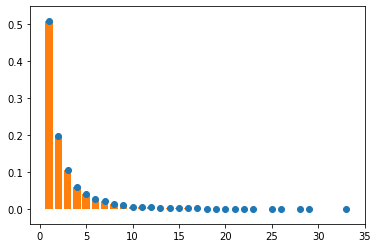

2.4853397382384474


In [7]:
p=0.8
def iterative():
    x=1
    pmf=-p**x/np.log(1-p)/x
    u=np.random.rand()
    cdf=pmf
    while(u>=cdf):
        x=x+1
        pmf=pmf*(p/x*(x-1))
        cdf=cdf+pmf
    return x

samples=[iterative() for i in range(10000)]

outcomes,counts=np.unique(samples,return_counts=True)
plt.scatter(outcomes,counts/np.sum(counts),zorder=2)

x=np.arange(1,np.max(outcomes))
pmf=-p**x/np.log(1-p)/x

plt.bar(outcomes,counts/np.sum(counts))

plt.show()

#x=1, 1 search
#x=2, 2 searches
#x=3, 3 searches
#....
print(-p/(1-p)/np.log(1-p))

##Q2. [3 Points]

* Compute the expected number of searches if we decide to use the upward/downward search method starting from $CDF(x=2)$.

[To get full points, you need to find the analytical solution based on the expected value of logarithmic distribution.]


In [8]:
Nsearches1=-p/(1-p)/np.log(1-p)-1+pmf[1]+3*pmf[0]
print(Nsearches1)

3.1753707602405914


##Q3. [5 Points]

We will use geometric distribution as our proposal distribution. It has the following PMF:
$$PMF(x)= (1-\theta)^{x-1} \theta, x=1,2,3, \dots, \infty$$

Here, $x$ is the number of trials taken to get the first success. 



* Derive a method to generate the samples at the same time based on the fact that $CDF(x)$ has a closed-form solution. [No need to show the derivation]. With this algorithm, generate 10000 samples from this distribution with $\theta=0.2$

* Plot the sample distribution v.s. the theoretical distribution.

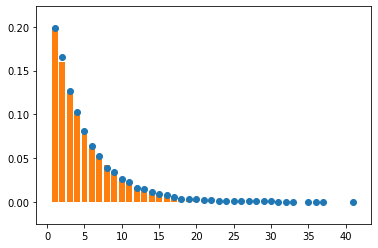

In [9]:
theta=0.2
p=0.8
proposals=1+np.floor(np.log(np.random.rand(10000))/np.log(1-theta))
x=np.arange(1,np.max(proposals)+1)
PMF_proposal=(1-theta)**(x-1)*theta

outcomes,counts=np.unique(proposals,return_counts=True)
plt.scatter(outcomes,counts/np.sum(counts),zorder=2)    
plt.bar(x,PMF_proposal)
plt.show()



##Q4. [10 Points]

* Plot the relationship between $x$ and $\frac{PMF_{target}(x)}{PMF_{proposal}(x)}$ for $x=1,2,3, \dots, 1000$ assuming $\theta=0.2$

* Generate 10000 samples from the target distribution using Geometric with $\theta=0.2$  as the proposal distribution. When generating the samples, use the parallel algorithm.

* Plot the sample distribution v.s. the theoretical distribution.

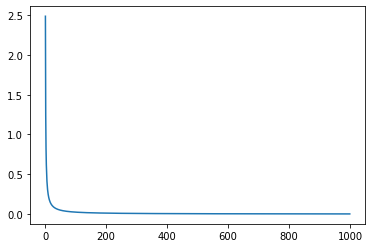

In [10]:
x=np.arange(1,1000)
theta=0.2
p=0.8
PMF_proposal=(1-theta)**(x-1)*theta
PMF_target=-p**x/np.log(1-p)/x

plt.plot(x, PMF_target/PMF_proposal)

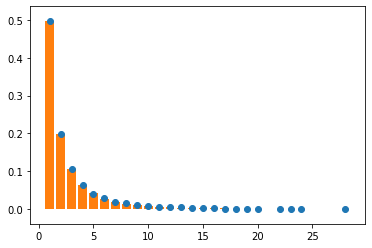

In [11]:
c=(PMF_target/PMF_proposal)[0]

N=10000
N_p=int(N*c+(N*c*(c-1))**0.5*4)
proposals=1+np.floor(np.log(np.random.rand(N_p))/np.log(1-theta))
AR=(-p**proposals/np.log(1-p)/proposals)/((1-theta)**(proposals-1)*theta)/c
U=np.random.rand(N_p)
samples=proposals[U<AR][0:N]
outcomes,counts=np.unique(samples,return_counts=True)
plt.scatter(outcomes,counts/np.sum(counts),zorder=2)    
x=np.arange(1,np.max(samples)+1)
PMF_target=-p**x/np.log(1-p)/x
plt.bar(x,PMF_target)    
plt.show()

## Q5. [10 Points]

For a discrete distribution, the part of PMF that does not vary with the outcome variable is called a "normalizing" constant. 

In our case, we can write down our target distribution using $$PMF_{target}(x)=\frac{-p^x}{x}A$$, where $x=1, 2, 3, \dots, \infty$. 

Here, A is a normalizing constant, which ensures that $\sum PMF_{target}(x)=1$.


Similarly, we can write down our proposal distribution using $$PMF_{proposal}(x)=(1-\theta)^{x-1}B$$, where $x=1, 2, 3, \dots, \infty$. 

Again, B is a normalizing constant, which ensures that $\sum PMF_{proposal}(x)=1$.

In practice, the normalizing constant might be hard to compute, as a result, we might have un-normalized PMF. 
$$PMF_{target}^{unnormalized}(x)=\frac{-p^x}{x}$$
$$PMF_{proposal}^{unnormalized}(x)=(1-\theta)^{x-1}$$

For rejection sampling, the algorithm works the same way even when the PMFs are not normalized. The only thing that changes is that $c$ will have a different interpretation.

Now, assume that we do not know how to compute the normalizing constant for the proposal distribution and target distribution.

* Define a function that generates one sample using rejection sampling treating $PMF_{target}^{unnormalized}(x)$ and $PMF_{proposal}^{unnormalized}(x)$ as normalized. Again, assume $p=0.8$ and $\theta=0.2$.
* Generate 10000 samples using this function. 
* Plot the sample distribution v.s. the theoretical distribution.
* Argue whether we can use $$PMF_{target}^{unnormalized}(x)$$ to generate samples from the inverse transform method. If so, 






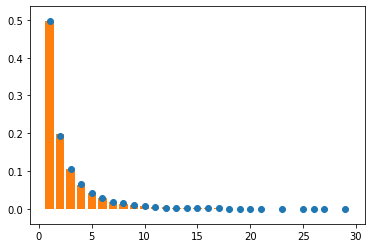

In [12]:
x=np.arange(1,100)
theta=0.2
p=0.8
PMF_proposal=(1-theta)**(x-1)
PMF_target=p**x/x
c=np.max(PMF_target/PMF_proposal)
def rejection():
    proposal=1+np.floor(np.log(np.random.rand())/np.log(1-theta))
    pmf_target=p**proposal/proposal

    pmf_proposal=(1-theta)**(proposal-1)
    ar=pmf_target/pmf_proposal/c
    while (np.random.rand()>ar):
        proposal=1+np.floor(np.log(np.random.rand())/np.log(1-theta))
        pmf_target=p**proposal/proposal
        pmf_proposal=(1-theta)**(proposal-1)
        ar=pmf_target/pmf_proposal/c
    return proposal

samples=[rejection() for i in range(10000)]
outcomes,counts=np.unique(samples,return_counts=True)

plt.scatter(outcomes,counts/np.sum(counts),zorder=2)    
x=np.arange(1,np.max(samples)+1)
PMF_target=-p**x/np.log(1-p)/x
plt.bar(x,PMF_target)    
plt.show()

#Exercise 3 [10 Points]
**Setting**

The distribution of $x$ is defined on $(-\infty, \infty)$ with the following CDF:

$F(x)=(1+exp(-x))^{-1}$



## Q1 [10 Points]

* Based on the inverse transform method, generate 1000 samples from the distribution. 
* Plot the sample distribution v.s. theoretical distribution.


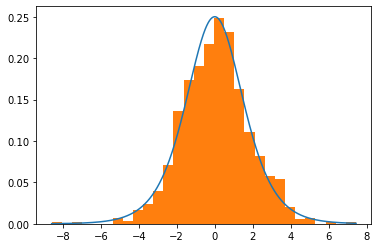

In [13]:
import sympy

x=sympy.Symbol("x")
u=sympy.Symbol("u")
sympy.solve((1+sympy.exp(-x))**(-1)-u,x)
x=sympy.Symbol("x")
u=sympy.Symbol("u")
sympy.diff((1+sympy.exp(-x))**(-1),x)
u=np.random.rand(1000)
samples=np.log(-u/(u-1))

x=np.linspace(np.min(samples),np.max(samples),1000)
pdf=np.exp(-x)/(1+np.exp(-x))**2
plt.plot(x,pdf)

plt.hist(samples,density=True,bins=30)    
plt.show()